# Introduction to Linear Algebra

Let's finding eigenvalues (i.e., energy spectrum) and eigenfunctions of the time-independent Schrodinger equation (utilizing [atomic units](https://en.wikipedia.org/wiki/Hartree_atomic_units) where $\hbar=m=1$)
\begin{align}\label{ExactHamiltonianCoordinateRep}
	\left[ -\frac{1}{2}\frac{d^2}{d x^2} + U(x) \right] \psi(x) = E \psi(x).
\end{align}

[**See also derivations in these in-class notes.**](https://wavetulane-my.sharepoint.com/:o:/g/personal/dbondar_tulane_edu/EjZjkvTFp4tNrthBttdxEJQBwxTUBJotcnkl_vWWOoY_XA?e=AjzyDr)

According to the **forward finite difference** approximation,  the derivative of a function $f(x)$ is approximated by

\begin{align}
	f'(x) &\approx [ f(x+\Delta x) - f(x) ] / \Delta x = \left[ f(x) + f'(x) \Delta x + O\left(\Delta x^2 \right) - f(x) \right] / \Delta x
	= f'(x) + O\left( \Delta x \right) \Longrightarrow \label{EqForwardDiffApprox} \\
	f''(x) &\approx [ f'(x+\Delta x) - f'(x) ] / \Delta x  = [ f(x+2\Delta x) - 2f(x + \Delta x) + f(x)] / \Delta x^2 + O\left( \Delta x \right). 
\end{align}

The discretized Schrodinger Eq. reads
\begin{align}\label{ForwardDiffHamiltonianDiscreet}
	-\frac{\psi(x_{k+2}) - 2\psi(x_{k+1})  + \psi(x_{k})}{2\Delta x^2} + U(x_k)  \psi(x_{k}) = E  \psi(x_{k}),
	\qquad k=1,1,2,\ldots,N,
\end{align}
whith the boundary condition $\psi(x_{N+1}) = \psi(x_{N+2}) =0$.

In other words
\begin{align}\label{ForwardDiffHamiltonianCoordinateRep}
	\left[
		\frac{-1}{2 \Delta x^2} 
		\begin{pmatrix}
			1	& -2	& 1 	&	&	& \\
				& 1	& -2	& 1	&	& \\
				&	& \ddots& \ddots & \ddots & \\
				&	&	& 1	& -2	& 1 \\	
				&	&	&	& 1	& -2 \\
				&	&	&	&	& 1 \\
		\end{pmatrix}
		+
		\begin{pmatrix}
			U(x_1)	&	&	&	&	& \\
				& U(x_2) &	&	&	& \\
				& 	& 	& \ddots &	& \\
				&	& 	& 	& U(x_{N-1})  & \\
				&	&	& 	& 	& U(x_{N})
		\end{pmatrix}
	\right]
	\begin{pmatrix}
	 \psi(x_1)\\
	 \psi(x_2) \\
	 \vdots \\
	 \psi(x_{N-1}) \\
	 \psi(x_N) 
	\end{pmatrix}
	= E
	\begin{pmatrix}
	 \psi(x_1)\\
	 \psi(x_2) \\
	 \vdots \\
	 \psi(x_{N-1}) \\
	 \psi(x_N) 
	\end{pmatrix}
 \end{align} 

In [1]:
using LinearAlgebra

$$
E_n = \hbar \omega\left(n + \frac{1}{2}\right),
\qquad n = 0,1,2, \ldots
$$

In [2]:
function energies_forward_fin_diff(U::Function, a::Real, b::Real, N::Int)
    x = range(a, b, N)
    Δx = x[2] - x[1]

    Hamiltonian =  -1 / (2 * Δx^2) * diagm(
        0 => ones(N), 
        1 => -2 * ones(N - 1), 
        2 => ones(N - 2)
    ) 

    Hamiltonian += diagm(U.(x))
        
    return eigvals(Hamiltonian)
end

energies_forward_fin_diff (generic function with 1 method)

In [9]:
energies = energies_forward_fin_diff(
    # potential energy U
    x -> 0.5 * x ^ 2,
    
    # a is the minimal x
    -4,
    
    # b is the max x
    +4,
    
    # N
    10
)

10-element Vector{Float64}:
 -0.5340470679012346
 -0.5340470679012346
  0.25607638888888884
  0.25607638888888884
  1.836323302469136
  1.836323302469136
  4.206693672839506
  4.206693672839506
  7.3671875
  7.3671875

In [4]:
energies[1]

-76.56949625675938

### 😱💩😱💩 backward finite difference is unphysical 😱💩😱💩

Even though the original Schrödinger eq. contains the self-adjoint Hamiltonian, the discretization with the forward difference approximation is non-Hermitian. This is the resource of unphysicallity of the forward and backward finite difference approximations.

## Central finite difference method

The central difference method
\begin{align}
	f'(x) &\approx [ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\left( \Delta x^2 \right) \Longrightarrow \label{CentralFinitDiffApprox} \\
	f''(x) &\approx  [ f'(x+\Delta x/2) - f'(x-\Delta x/2) ] / \Delta x  = [ f(x + \Delta x) - 2f(x) + f(x- \Delta x)] / \Delta x^2  + O\left( \Delta x^2 \right). 
\end{align}

The discretized Schrodinger Eq. reads
\begin{align}
	-\frac{\psi(x_{k+1}) - 2\psi(x_{k})  + \psi(x_{k - 1})}{2\Delta x^2} + U(x_k)  \psi(x_{k}) = E  \psi(x_{k}),
	\qquad k=1,1,2,\ldots,N,
\end{align}

with the boundary conditions $\psi(x_{0}) = \psi(x_{N+1}) = 0$, which is a grid representation of $\psi(\pm\infty) = 0$.

This leads to the Hermitian finite dimensional approximation of the Hamiltonian:
\begin{align}
	\left[
		\frac{-1}{2 \Delta x^2} 
		\begin{pmatrix}
			-2	& 1 &	&	& \\
			1	& -2	& 1 &	& \\
				 & \ddots & \ddots & \ddots & \\
				&	& 1	& -2	& 1 \\
				&	&	& 1	& -2
		\end{pmatrix}
		+
		\begin{pmatrix}
			U(x_1)	&	&	&	&	& \\
				& U(x_2) &	&	&	& \\
				& 	& 	& \ddots &	& \\
				&	& 	& 	& U(x_{N-1})  & \\
				&	&	& 	& 	& U(x_{N})
		\end{pmatrix}
	\right]
	\begin{pmatrix}
	 \psi(x_1)\\
	 \psi(x_2) \\
	 \vdots \\
	 \psi(x_{N-1}) \\
	 \psi(x_N) 
	\end{pmatrix}
	= E
	\begin{pmatrix}
	 \psi(x_1)\\
	 \psi(x_2) \\
	 \vdots \\
	 \psi(x_{N-1}) \\
	 \psi(x_N) 
	\end{pmatrix}
 \end{align} 

Thus, the central finite difference preserves the physical structure and it leads to reliable numerical results.

In [11]:
function energies_central_fin_diff(U::Function, a::Real, b::Real, N::Int)
    x = range(a, b, N)
    Δx = x[2] - x[1]

    Hamiltonian =  -1 / (2 * Δx^2) * diagm(
        -1 => ones(N - 1), 
        0 => -2 * ones(N), 
        1 => ones(N - 1), 
    ) 

    Hamiltonian += diagm(U.(x))
        
    return eigvals(Hamiltonian)
end

energies_central_fin_diff (generic function with 1 method)

In [22]:
energies = energies_central_fin_diff(
    # potential energy U
    x -> 0.5 * x ^ 2,
    
    # a is the minimal x
    -10,
    
    # b is the max x
    +10,
    
    # N
    1000
)

1000-element Vector{Float64}:
    0.49998747464970755
    1.4999373719883735
    2.499837163529365
    3.4996868455034345
    4.499486414144084
    5.499235865681952
    6.498935196347525
    7.49858440236983
    8.498183479977952
    9.497732425398818
   10.497231234858136
   11.496679904582027
   12.496078430795666
    ⋮
 5010.192950405055
 5010.192950405055
 5013.3997767010715
 5013.399776701072
 5016.967732199277
 5016.967732199281
 5021.012520465711
 5021.012520465717
 5025.757893886191
 5025.7578938861925
 5031.783720339471
 5031.783720339476

In [23]:
diff(energies)

999-element Vector{Float64}:
 0.999949897338666
 0.9998997915409915
 0.9998496819740694
 0.9997995686406491
 0.9997494515378689
 0.9996993306655728
 0.9996492060223048
 0.9995990776081216
 0.9995489454208659
 0.9994988094593182
 0.9994486697238916
 0.9993985262136391
 0.9993483789262037
 ⋮
 2.914774297081749
 0.0
 3.2068262960165157
 9.094947017729282e-13
 3.5679554982043555
 4.547473508864641e-12
 4.04478826642935
 6.366462912410498e-12
 4.7453734204736975
 1.8189894035458565e-12
 6.025826453278569
 4.547473508864641e-12

In [24]:
using PyPlot

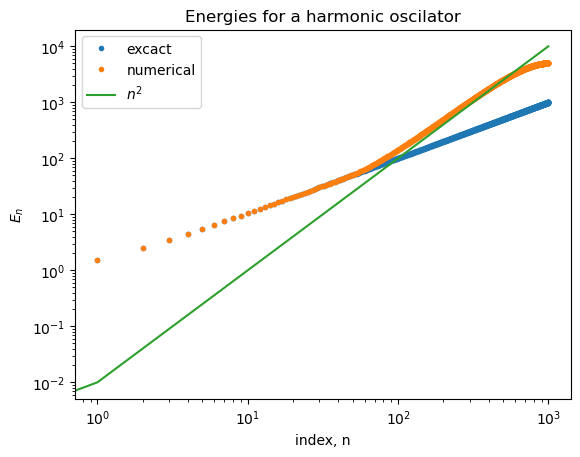

In [32]:
n = 0:(length(energies) - 1)
En = n .+ 0.5

title("Energies for a harmonic oscilator")
loglog(En, ".", label="excact")
loglog(energies, ".", label="numerical")
loglog(n, 0.01 * n .^ 2, label=L"n^2")
xlabel("index, n")
ylabel(L"E_n")
legend()
show()

### Getting wavefunctions (i.e., eignvectors)

In [53]:
function energies_wavefunc_central_fin_diff(U::Function, a::Real, b::Real, N::Int)
    x = range(a, b, N)
    Δx = x[2] - x[1]

    Hamiltonian =  -1 / (2 * Δx^2) * diagm(
        -1 => ones(N - 1), 
        0 => -2 * ones(N), 
        1 => ones(N - 1), 
    ) 

    Hamiltonian += diagm(U.(x))
        
    return eigen(Hamiltonian), Hamiltonian, x
end

energies_wavefunc_central_fin_diff (generic function with 1 method)

In [54]:
results, Hamiltonian, x = energies_wavefunc_central_fin_diff(
    # potential energy U
    x -> 0.5 * x ^ 2,
    
    # a is the minimal x
    -10,
    
    # b is the max x
    +10,
    
    # N
    1000
);

## Test eigenvectors

In [55]:
Hamiltonian * results.vectors[:, 1] ≈ results.values[1] * results.vectors[:, 1]

true

In [56]:
Hamiltonian * results.vectors[:, 3] ≈ results.values[3] * results.vectors[:, 3]

true

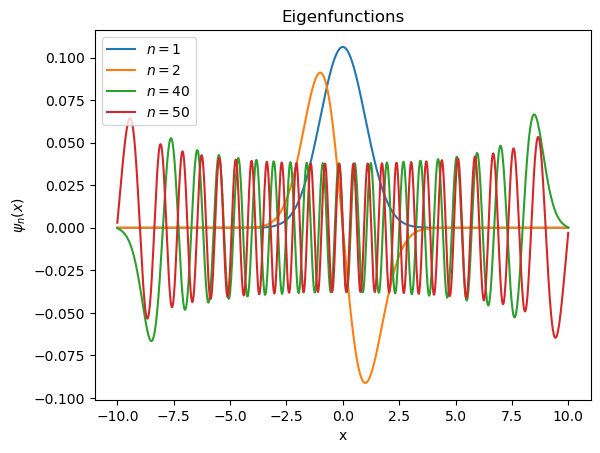

In [67]:
title("Eigenfunctions")
plot(x, results.vectors[:, 1], label=L"n=1")
plot(x, results.vectors[:, 2], label=L"n=2")

plot(x, results.vectors[:, 40], label=L"n=40")

plot(x, results.vectors[:, 50], label=L"n=50")

xlabel("x")
ylabel(L"\psi_n(x)")
legend()
show()

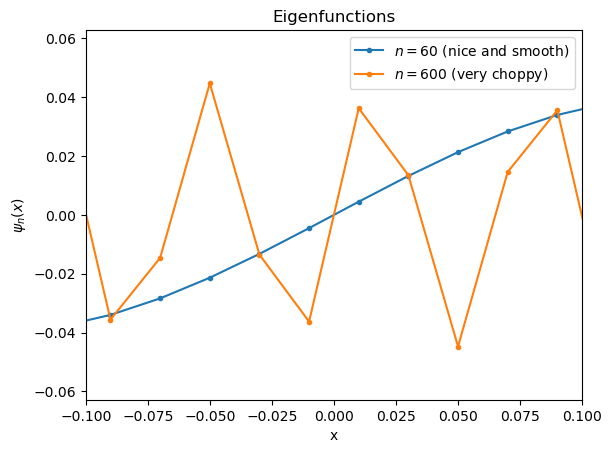

In [78]:
title("Eigenfunctions")

plot(x, results.vectors[:, 60], ".-", label=L"n=60" * " (nice and smooth)")
plot(x, results.vectors[:, 600], ".-", label=L"n=600" * " (very choppy)")
xlim([-0.1, 0.1])

xlabel("x")
ylabel(L"\psi_n(x)")
legend()
show()

**Note:** All eigenfunctions with $n > N/2$ are physically meaningless because they violate [Nyquist–Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem). It states that *if a function contains no frequencies higher than $B$ hertz, then it can be completely determined from its values at a sequence of points spaced less than $1 / ( 2 B )$ seconds apart.*

In our quantum mechanical example, $1/n$ is proxy for $B$ because the $n$-th eigenstate has $n-1$ zeros (i.e., oscilations). Hence, according to the Nyquist–Shannon sampling theorem we need at least $2n$ grid points to capture wavefunction. Hence, A=all eigenfunctions with $n > N/2$ are meaningless. 
